# 1 - Packages

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

2023-05-03 15:58:32.416737: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 15:58:33.004252: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


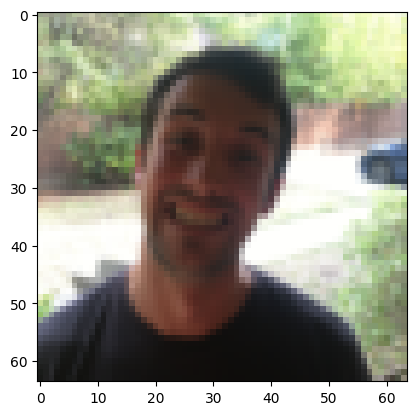

In [3]:
index = 5
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

# 2 - The Sequential API

In [4]:
# GRADED FUNCTION: happyModel
def happyModel():
    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
            ## Conv2D with 32 7x7 filters and stride of 1
            tfl.Conv2D(32, (7,7)),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis=-1),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D with default parameters
            tfl.MaxPool2D(),
            ## Flatten layer
            tfl.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tfl.Dense(1, activation='sigmoid')
        ])
    
    return model

In [5]:
happy_model = happyModel()
# Print a summary for each layer
for layer in summary(happy_model):
    print(layer)
    
output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]
    
comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


2023-05-03 15:58:51.430032: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-03 15:58:51.867802: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [7]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

In [8]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 2s 28ms/step - loss: 1.0448 - accuracy: 0.7150
Epoch 2/10
38/38 [==============================] - 1s 26ms/step - loss: 0.2384 - accuracy: 0.9000
Epoch 3/10
38/38 [==============================] - 1s 26ms/step - loss: 0.1341 - accuracy: 0.9533
Epoch 4/10
38/38 [==============================] - 1s 25ms/step - loss: 0.1564 - accuracy: 0.9400
Epoch 5/10
38/38 [==============================] - 1s 26ms/step - loss: 0.1253 - accuracy: 0.9550
Epoch 6/10
38/38 [==============================] - 1s 25ms/step - loss: 0.1983 - accuracy: 0.9367
Epoch 7/10
38/38 [==============================] - 1s 26ms/step - loss: 0.0801 - accuracy: 0.9733
Epoch 8/10
38/38 [==============================] - 1s 25ms/step - loss: 0.0584 - accuracy: 0.9817
Epoch 9/10
38/38 [==============================] - 1s 26ms/step - loss: 0.0891 - accuracy: 0.9683
Epoch 10/10
38/38 [==============================] - 1s 25ms/step - loss: 0.1216 - accuracy: 0.9467


In [9]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 12ms/step - loss: 0.1790 - accuracy: 0.9267


[0.17902787029743195, 0.9266666769981384]

# 3 - The Functional API

In [10]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


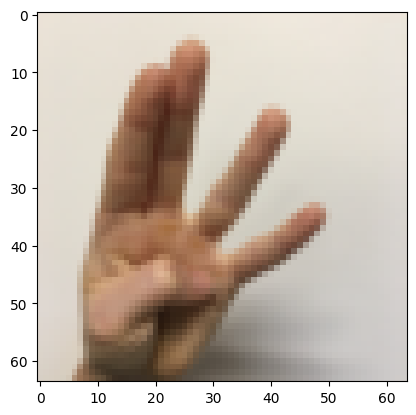

In [11]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [12]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [13]:
# GRADED FUNCTION: convolutional_model
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    
    # CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tfl.Conv2D(8, 4, activation='linear', padding="same", strides=1)(input_img)
    
    ## RELU
    A1 = tfl.ReLU()(Z1)
    
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)
    
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tfl.Conv2D(16, 2, activation='linear', padding="same", strides=1)(P1)
    
    ## RELU
    A2 = tfl.ReLU()(Z2)
    
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    
    ## FLATTEN
    F = tfl.Flatten()(P2)
    
    ## Dense layer
    outputs = tfl.Dense(6, activation='softmax')(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [14]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]
    
comparator(summary(conv_model), output)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_2 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100


2023-05-03 15:59:16.956791: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype double and shape [1080,6]
	 [[{{node Placeholder/_1}}]]


17/17 [==============================] - 1s 25ms/step - loss: 1.7933 - accuracy: 0.1935 - val_loss: 1.7906 - val_accuracy: 0.1833
Epoch 2/100
 4/17 [======>.......................] - ETA: 0s - loss: 1.7819 - accuracy: 0.2188

2023-05-03 15:59:17.716741: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype double and shape [120,6]
	 [[{{node Placeholder/_1}}]]


17/17 [==============================] - 0s 20ms/step - loss: 1.7848 - accuracy: 0.2065 - val_loss: 1.7887 - val_accuracy: 0.1667
Epoch 3/100
17/17 [==============================] - 0s 21ms/step - loss: 1.7780 - accuracy: 0.2287 - val_loss: 1.7831 - val_accuracy: 0.2167
Epoch 4/100
17/17 [==============================] - 0s 20ms/step - loss: 1.7696 - accuracy: 0.2574 - val_loss: 1.7765 - val_accuracy: 0.2667
Epoch 5/100
17/17 [==============================] - 0s 20ms/step - loss: 1.7586 - accuracy: 0.3287 - val_loss: 1.7664 - val_accuracy: 0.3333
Epoch 6/100
17/17 [==============================] - 0s 22ms/step - loss: 1.7448 - accuracy: 0.3981 - val_loss: 1.7544 - val_accuracy: 0.3500
Epoch 7/100
17/17 [==============================] - 0s 20ms/step - loss: 1.7292 - accuracy: 0.4269 - val_loss: 1.7411 - val_accuracy: 0.3583
Epoch 8/100
17/17 [==============================] - 0s 20ms/step - loss: 1.7109 - accuracy: 0.4398 - val_loss: 1.7255 - val_accuracy: 0.4083
Epoch 9/100
17/17 

17/17 [==============================] - 0s 20ms/step - loss: 0.5732 - accuracy: 0.8213 - val_loss: 0.6782 - val_accuracy: 0.7250
Epoch 60/100
17/17 [==============================] - 0s 21ms/step - loss: 0.5661 - accuracy: 0.8231 - val_loss: 0.6736 - val_accuracy: 0.7333
Epoch 61/100
17/17 [==============================] - 0s 20ms/step - loss: 0.5592 - accuracy: 0.8259 - val_loss: 0.6697 - val_accuracy: 0.7250
Epoch 62/100
17/17 [==============================] - 0s 21ms/step - loss: 0.5530 - accuracy: 0.8269 - val_loss: 0.6648 - val_accuracy: 0.7250
Epoch 63/100
17/17 [==============================] - 0s 20ms/step - loss: 0.5468 - accuracy: 0.8287 - val_loss: 0.6606 - val_accuracy: 0.7250
Epoch 64/100
17/17 [==============================] - 0s 21ms/step - loss: 0.5412 - accuracy: 0.8324 - val_loss: 0.6557 - val_accuracy: 0.7250
Epoch 65/100
17/17 [==============================] - 0s 20ms/step - loss: 0.5348 - accuracy: 0.8370 - val_loss: 0.6516 - val_accuracy: 0.7250
Epoch 66/100

# 4 - History Object

In [16]:
history.history

{'loss': [1.7933399677276611,
  1.7848349809646606,
  1.777950644493103,
  1.7695542573928833,
  1.7586132287979126,
  1.7448192834854126,
  1.7292300462722778,
  1.7109414339065552,
  1.68874990940094,
  1.6627941131591797,
  1.6322145462036133,
  1.5976725816726685,
  1.5605950355529785,
  1.5230146646499634,
  1.4855211973190308,
  1.4477341175079346,
  1.407984972000122,
  1.3699570894241333,
  1.332473635673523,
  1.29497230052948,
  1.259155035018921,
  1.2251871824264526,
  1.189995527267456,
  1.1555933952331543,
  1.1223092079162598,
  1.089653491973877,
  1.0607393980026245,
  1.0314946174621582,
  1.0031076669692993,
  0.9736126065254211,
  0.9471356868743896,
  0.9197847843170166,
  0.89390629529953,
  0.8692613244056702,
  0.8470820784568787,
  0.826292872428894,
  0.8061801195144653,
  0.7885309457778931,
  0.7713398337364197,
  0.7549073696136475,
  0.7411471605300903,
  0.7270810604095459,
  0.7141910791397095,
  0.7019571661949158,
  0.6909223794937134,
  0.67986112833

/tmp/ipykernel_84/973814028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/tmp/ipykernel_84/973814028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

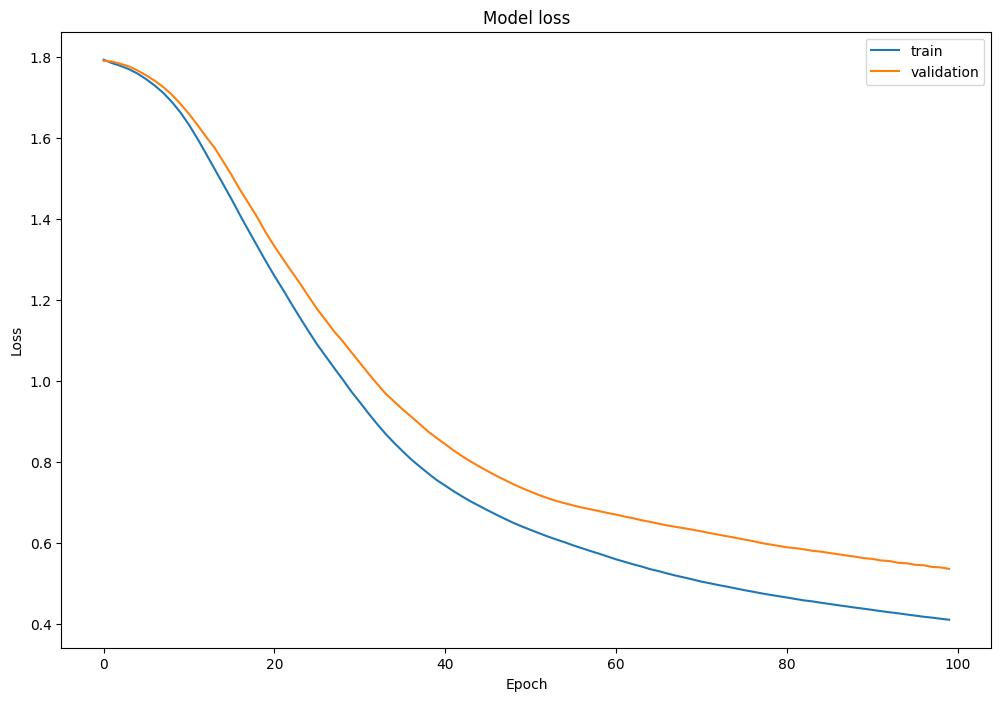

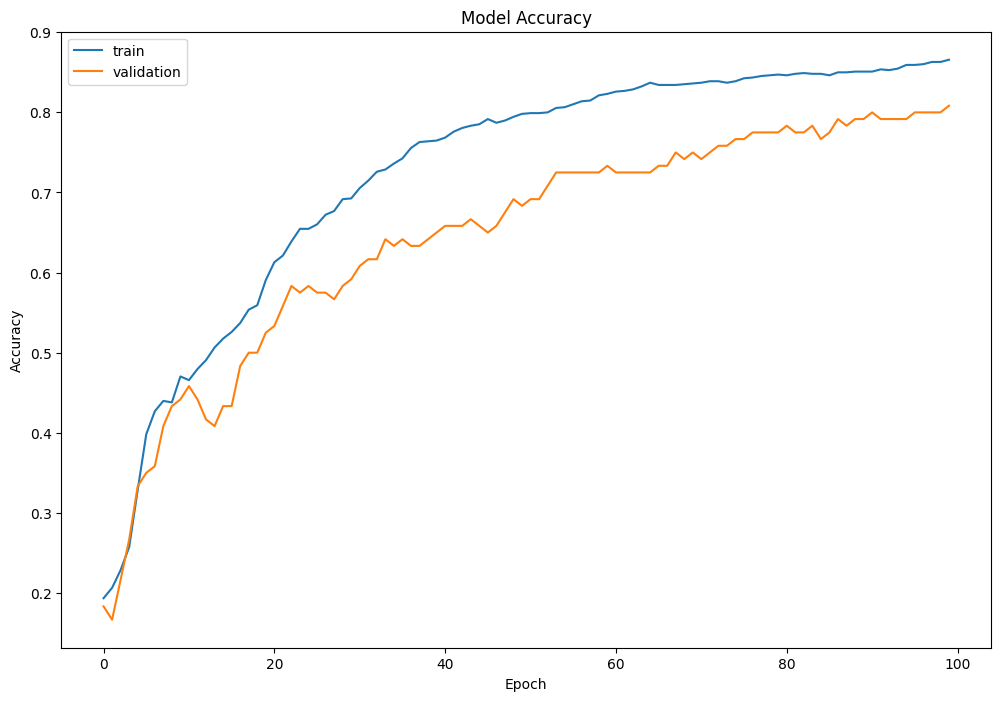

In [17]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')